In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
plt.style.use('seaborn')
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    KFold,
    RepeatedStratifiedKFold,
    cross_val_score,
    train_test_split,
)
np.random.seed(3)


In [4]:
path = "../data/"

df = pd.read_csv(path + "VBM_data.csv")
X = df.loc[:, df.columns.drop(["Subjectt", "Sex", "Chr", "PD", "PSQI"])]

y = df.pop("PD")

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = X[column].apply(lambda x: str(x.replace(',', '')))
        X[column] = X[column].astype('float')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


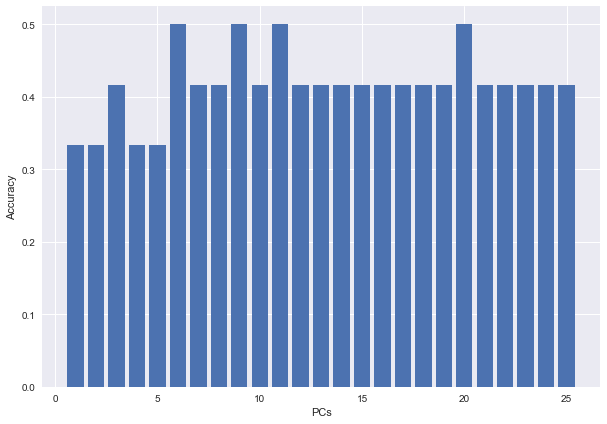

In [5]:
def make_pcc(X_train, X_test, y_train, y_test):
    number_of_feature_columns = X_train.shape[1]
    accuracy_history = []
    components = [i+1 for i in range(25)]
    
    for i in range(1, 26):
        pca = PCA(n_components=i)
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        clf = RandomForestClassifier()
        clf.fit(X_train_pca, y_train)
        y_pred = clf.predict(X_test_pca)
        accuracy_history.append(metrics.accuracy_score(y_test, y_pred))
    assert len(accuracy_history) == len(components)
    figure(figsize=(10,7))
    plt.bar(components , accuracy_history)
    plt.xlabel('PCs')
    plt.ylabel('Accuracy')
    plt.show()
    
make_pcc(X_train, X_test, y_train, y_test)